<a href="https://colab.research.google.com/github/naveenbreddy/My-project-works/blob/main/Titanic_Survivors_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my first full scale Kaggle competition project

Instaling Kaggle library to directly download Kaggle datasets from Kaggle using API



In [60]:
#! pip install kaggle

In [61]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [62]:
! cp kaggle.json ~/.kaggle/

In [63]:
! chmod 600 ~/.kaggle/kaggle.json

In [64]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [65]:
import zipfile

In [66]:
!unzip titanic.zip -d /content/

Archive:  titanic.zip
replace /content/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing all libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [68]:
titan = pd.read_csv('/content/train.csv')

In [69]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Moving the target feature to the right end just for better visibility

In [70]:
df1 = titan.pop('Survived')

In [71]:
titan['survived'] = df1

In [72]:
titan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


We dont need passenger ID for prediction as it does not make any valuable contribution to the survived column

In [73]:
titan.shape

(891, 12)

In [74]:
#statistics 

In [75]:
X1 = titan.isnull().sum()
type(X1)
a= titan.shape[0]
X1 = X1.apply(lambda x: round((x/a)*100),1)

In [76]:
X1 #calculating the percentage of missing values in the dataframe

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            20
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          77
Embarked        0
survived        0
dtype: int64

In [77]:
#Will drop the cabin column as it has more than 77% of nulls in it

In [78]:
titan.drop(['Cabin'],axis=1,inplace = True)

In [79]:
titan.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
survived         0
dtype: int64

In [80]:
#lets look at the datatype for age column to see what we can impute the missing
#vaues with

In [81]:
titan['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

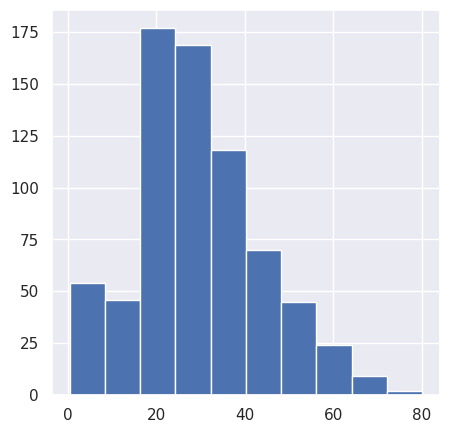

In [82]:
plt.figure(figsize = (5,5))
plt.hist(titan['Age'])

In [83]:
#looks almost like normal distribution so we can impute with the mean

In [84]:
titan['Age'].fillna(titan['Age'].mean(), inplace = True) 

In [85]:
titan.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
survived       0
dtype: int64

In [86]:
#looking at embarked
#titan['Embarked'].describe()
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
titan['Embarked'].fillna(titan['Embarked'].mode()[0],inplace = True)

In [88]:
titan.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
survived       0
dtype: int64

Now that we got all null values sorted! lets look at some distributions to undertand the data better

In [89]:
titan['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

# Data Visualization

In [90]:
sns.set()

<Axes: xlabel='survived', ylabel='count'>

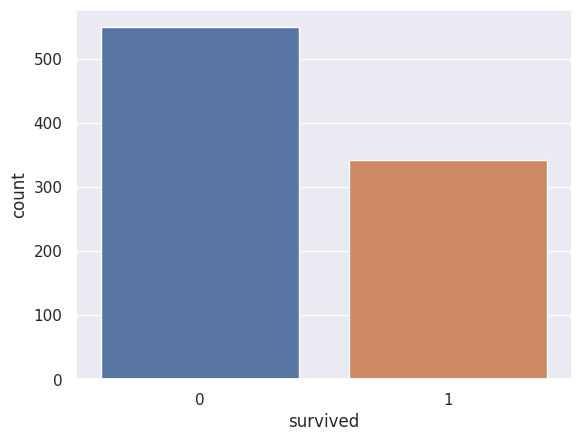

In [91]:
sns.countplot(x = titan['survived'])

<Axes: xlabel='Sex', ylabel='count'>

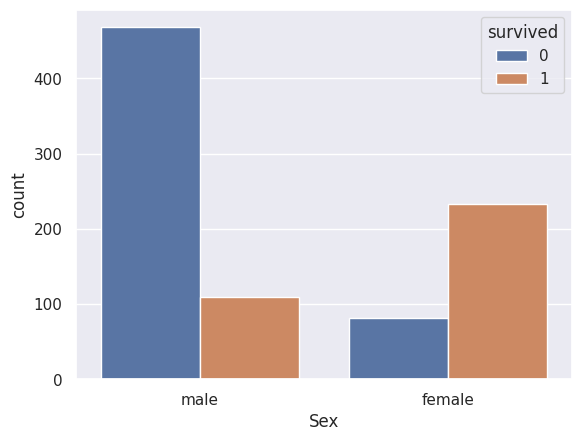

In [92]:
sns.countplot(x = titan['Sex'], hue = titan['survived'])

<Axes: xlabel='Pclass', ylabel='Count'>

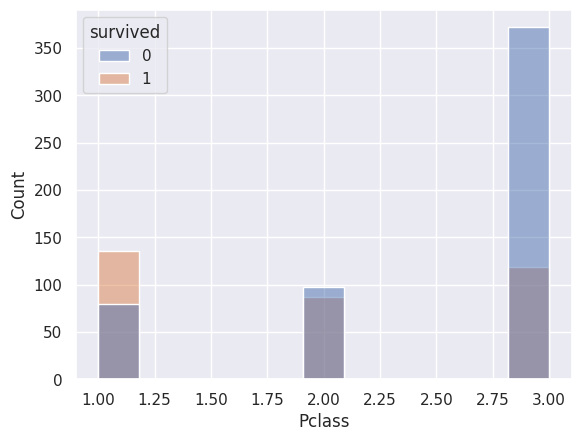

In [93]:
sns.histplot(x = titan['Pclass'], hue = titan['survived'])

<Axes: xlabel='Sex', ylabel='Age'>

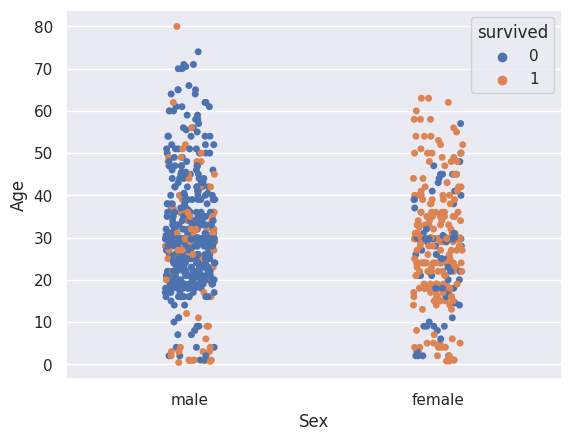

In [94]:
sns.stripplot(x = titan['Sex'], y = titan['Age'], hue = titan['survived'])

<Axes: xlabel='Sex', ylabel='Age'>

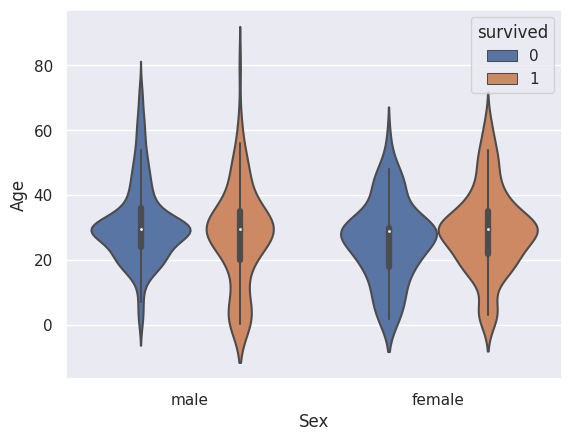

In [95]:
sns.violinplot(x = titan['Sex'], y = titan['Age'], hue = titan['survived'])

# Data preprocessing

In [96]:
titan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [97]:
#we dont need the name for prediction so will drop name

In [98]:
titan.drop(['Name'], axis = 1, inplace = True)

In [99]:
titan.drop(['Ticket'], axis = 1, inplace = True)

In [100]:
titan.drop(['PassengerId'], axis = 1, inplace = True)

In [101]:
titan['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [102]:
titan['Sex'] = titan['Sex'].apply(lambda x : 0 if x == 'male' else 1)

In [103]:
titan['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [104]:
titan.replace({'Embarked':{'S':0, 'C':1, 'Q' :2}}, inplace= True)

In [105]:
titan['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [106]:
titan.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0


separating target and predictor variables

In [107]:
X = titan[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = titan[['survived']]

In [108]:
X['age_category'] = pd.cut(X['Age'], bins = [8,16,24,32,40,48,56,64,72,80], labels=['Kid','child','teenager','youth','thirties','fourties','fifties','sixties','seventies'])

In [109]:
X['fare_category'] = pd.cut(X['Fare'], bins = [0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

In [110]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_category,fare_category
0,3,0,22.0,1,0,7.2500,0,child,Low
1,1,1,38.0,1,0,71.2833,1,youth,High
2,3,1,26.0,0,0,7.9250,0,teenager,Mid
3,1,1,35.0,1,0,53.1000,0,youth,High
4,3,0,35.0,0,0,8.0500,0,youth,Mid


In [111]:
X.drop(['Age','Fare'], axis = 1, inplace = True)

In [112]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,age_category,fare_category
0,3,0,1,0,0,child,Low
1,1,1,1,0,1,youth,High
2,3,1,0,0,0,teenager,Mid
3,1,1,1,0,0,youth,High
4,3,0,0,0,0,youth,Mid


In [113]:
A = pd.get_dummies(X[['age_category','fare_category']])

In [120]:
X = pd.concat([X, A], axis = 1)

In [125]:
X = X.drop(['age_category','fare_category'], axis=1)

In [126]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,age_category_Kid,age_category_child,age_category_teenager,age_category_youth,age_category_thirties,age_category_fourties,age_category_fifties,age_category_sixties,age_category_seventies,fare_category_Low,fare_category_Mid,fare_category_High_Mid,fare_category_High
0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


#Modeling 

In [130]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
#Using SVMs
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)

#using feature selection to see which are most important features:
selector = SelectFromModel(svm_model, prefit=True)
important_features = X_train.columns[selector.get_support()]

print('Important features are :', important_features)

svm_preds = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_preds)
print(svm_acc)
svm_cnf = confusion_matrix(y_test, svm_preds)
print(svm_cnf)


Important features are : Index(['Sex', 'age_category_Kid', 'age_category_child',
       'age_category_teenager', 'age_category_youth', 'age_category_thirties',
       'age_category_fourties', 'age_category_fifties',
       'age_category_sixties'],
      dtype='object')
0.7877094972067039
[[89 16]
 [22 52]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
#Using Logistic regression:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

selector = SelectFromModel(lr_model, prefit = True)
important_features = X_train.columns[selector.get_support()]

print('important features:', important_features)

lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print('logistic regression accuracy score:',lr_acc)

lr_cnf = confusion_matrix(y_test, lr_preds)
print('confusion matric for logistic regression model', lr_cnf)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


important features: Index(['Pclass', 'Sex', 'age_category_Kid', 'age_category_child',
       'age_category_teenager', 'age_category_youth', 'age_category_thirties',
       'age_category_fourties', 'age_category_fifties',
       'age_category_sixties'],
      dtype='object')
logistic regression accuracy score: 0.7821229050279329
confusion matric for logistic regression model [[88 17]
 [22 52]]


In [145]:
#Using xgboost:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0)
xgb_model.fit(X_train,y_train)

selector = SelectFromModel(xgb_model, prefit = True)
important_features = X_train.columns[selector.get_support()]

print('important features:', important_features)

xgb_preds = xgb_model.predict(X_test)
xgb_acc = round(accuracy_score(y_test, xgb_preds) * 100, 2)
print("XGBoost Model accuracy on validation data:", xgb_acc)

xgb_cnf = confusion_matrix(y_test, xgb_preds)
print('confusion matric for logistic regression model', xgb_cnf)

important features: Index(['Pclass', 'Sex', 'Embarked'], dtype='object')
XGBoost Model accuracy on validation data: 78.77
confusion matric for logistic regression model [[94 11]
 [27 47]]


In [146]:
#Using Random forest classifier:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

selector = SelectFromModel(rf_model, prefit = True)
important_features = X_train.columns[selector.get_support()]

print('important features:', important_features)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print('logistic regression accuracy score:',lr_acc)

rf_cnf = confusion_matrix(y_test, rf_preds)
print('confusion matric for logistic regression model', rf_cnf)

<ipython-input-146-173d37a0d80f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


important features: Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')
logistic regression accuracy score: 0.7821229050279329
confusion matric for logistic regression model [[90 15]
 [18 56]]
